In [2]:
import pandas as pd
from pandas_profiling import ProfileReport as pp 
## Pandas_Profiling is a very helpful package to get overall statistical information of whole dataset, 
##but if the size of the dataset is too big, it will need more time to generate.
import missingno as msno 
## Visualizing the null values

In [3]:
Train=pd.read_csv("train.csv")
Test=pd.read_csv("test.csv")

In [4]:
pp(Train)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Exploratory Data Analysis

In [4]:
Train.shape

(891, 12)

In [5]:
Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
Train.info()   #Surviived should be Categorical Variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Train.describe() #describe shows statistical information of numerical variables

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
Test.shape

(418, 11)

In [9]:
Test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
Test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [12]:
# Test the PassengerID. Are they all unique? Answer:Yes

In [13]:
Train["PassengerId"].value_counts().sum()

891

In [14]:
Test["PassengerId"].value_counts().sum()

418

## Categorical Variables and Numercial Variables

In [15]:
Categorical_Variables=['Survived', 'Pclass','Sex','SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked']

In [16]:
Numercial_Variables=['Age','Fare']

In [17]:
for i in Categorical_Variables:
    print(Train[i].value_counts(),"\n\n")

0    549
1    342
Name: Survived, dtype: int64 


3    491
1    216
2    184
Name: Pclass, dtype: int64 


male      577
female    314
Name: Sex, dtype: int64 


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 


347082                7
1601                  7
CA. 2343              7
CA 2144               6
3101295               6
                     ..
112277                1
350034                1
367655                1
SOTON/O.Q. 3101311    1
SOTON/OQ 392090       1
Name: Ticket, Length: 681, dtype: int64 


G6             4
C23 C25 C27    4
B96 B98        4
C22 C26        3
F33            3
              ..
E58            1
D10 D12        1
B3             1
A19            1
B38            1
Name: Cabin, Length: 147, dtype: int64 


S    644
C    168
Q     77
Name: Embarked, dtype: int64 




In [20]:
#550 rows has only 1 missing value, 158 rows has 2 missing values
Train.isnull().sum(axis=1).value_counts()

1    550
0    183
2    158
dtype: int64

In [36]:
Train.isnull().sum(axis=1).value_counts()/Train.shape[0]*100

1    61.728395
0    20.538721
2    17.732884
dtype: float64

In [19]:
#Age, Cabin, Embarked has null values
Train.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
Train.isnull().sum(axis=0)/Train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

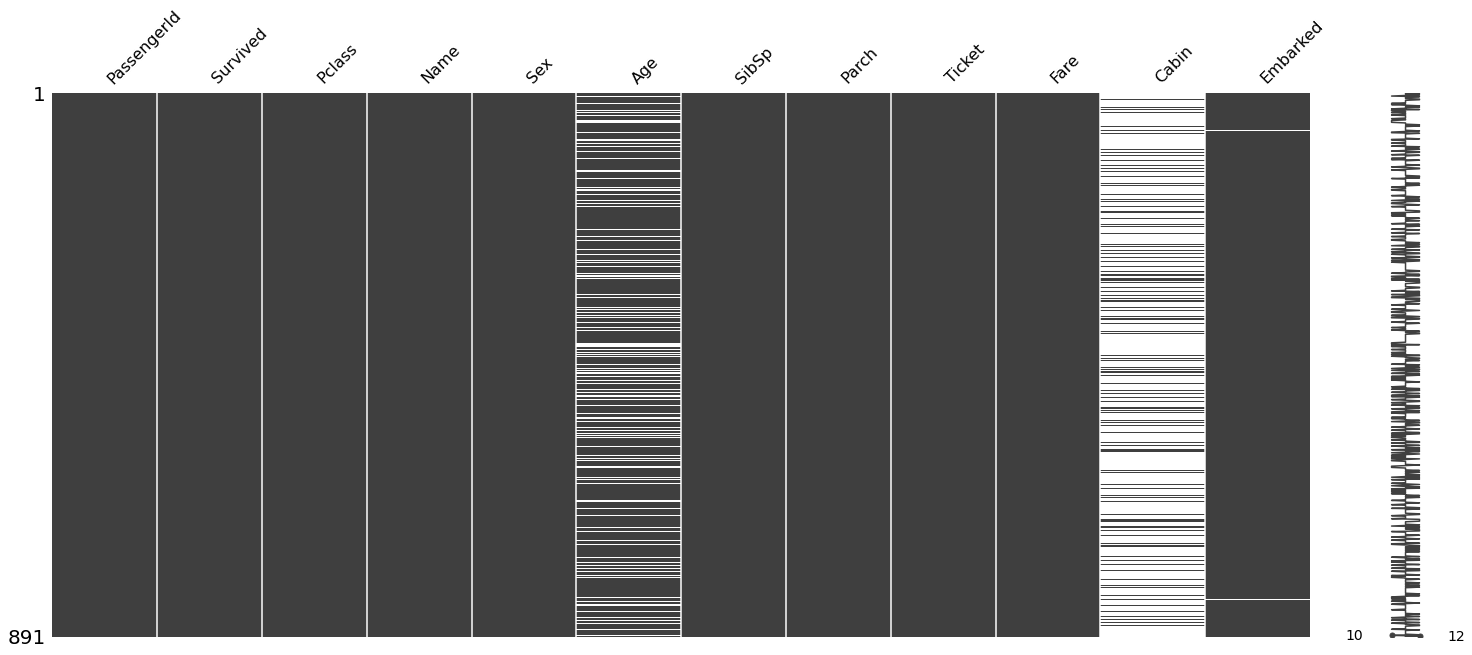

In [21]:
msno.matrix(Train)

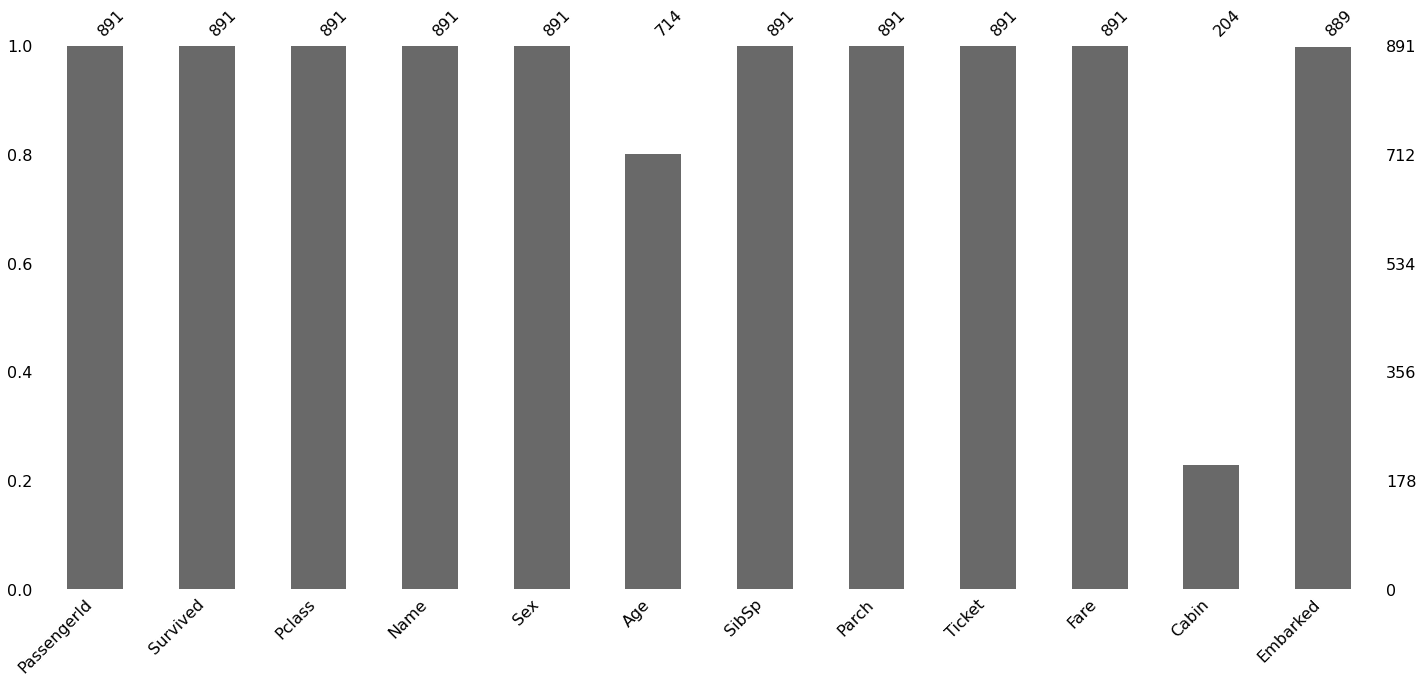

In [22]:
msno.bar(Train)

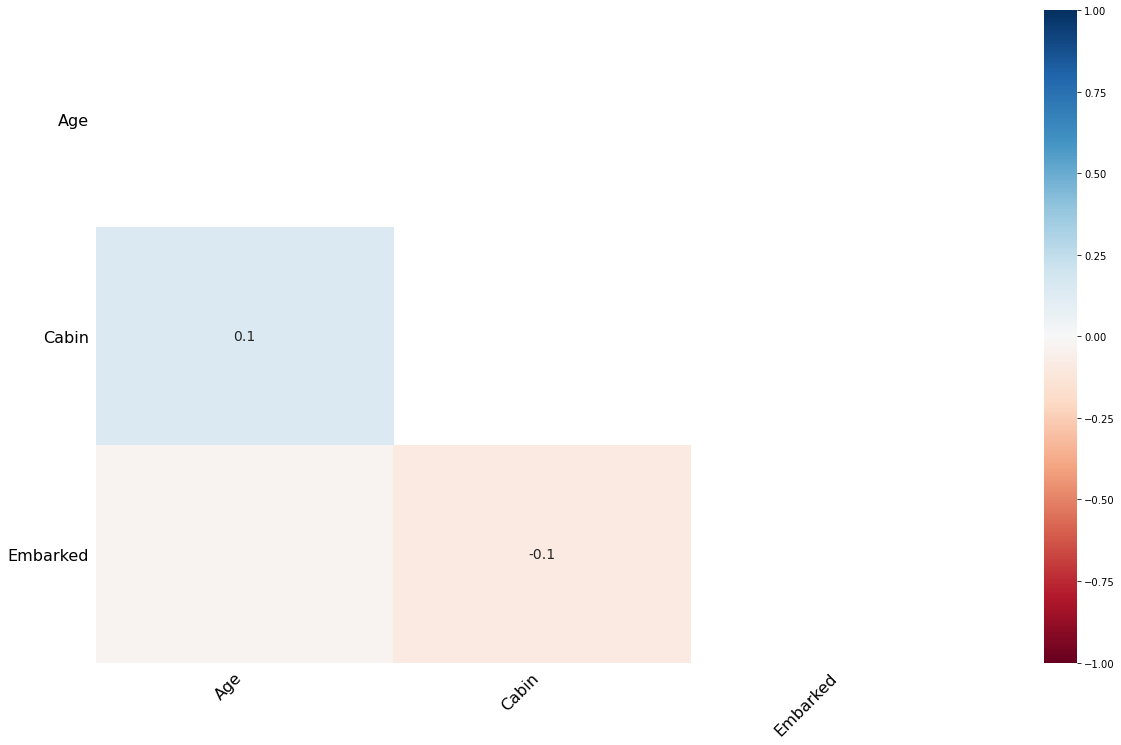

In [24]:
msno.heatmap(Train)
# A value near -1 means if one variable appears then the other variable is very likely to be missing.
# A value near 0 means there is no dependence between the occurrence of missing values of two variables.
# A value near 1 means if one variable appears then the other variable is very likely to be present.

# Based on the graph, there is no patterns related to those three column

# relationshipes

In [35]:
#Check the data balance
Train['Survived'].value_counts()/Train.shape[0]*100
# It is imbalance data

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:
What kind of algorithm that we want? 